**Aim : Linear regression by using Deep Neural network:**
      
Implement Boston housing price prediction 
        problem by Linear regression using Deep Neural network. 
        Use Boston House price predictiondataset.

**About the Dataset**

We will be working on a data set that comes from the real estate industry in Boston (US). This database contains 14 attributes. The target
variable refers to the median value of owner-occupied homes in 1000 USD's.



*   CRIM: per capita crime rate by town
*   ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS: proportion of non-retail business acres per town
*   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX: nitric oxides concentration (parts per 10 million)
*   RM: average number of rooms per dwelling
*   AGE: proportion of owner-occupied units built prior to 1940
*   DIS: weighted distances to five Boston employment centres
*   RAD: index of accessibility to radial highways
*   TAX: full-value property-tax rate per 10,000 USD
*   PTRATIO: pupil-teacher ratio by town
*   B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT: lower status of the population (%)
*   MEDV: Median value of owner-occupied homes in 1000 USD's (Target)

















































### **Importing libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

### **Setting values**

In [ ]:
test_size = 0.2
learning_rate = 0.01
epochs = 150
batch = 32

### **Loading dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

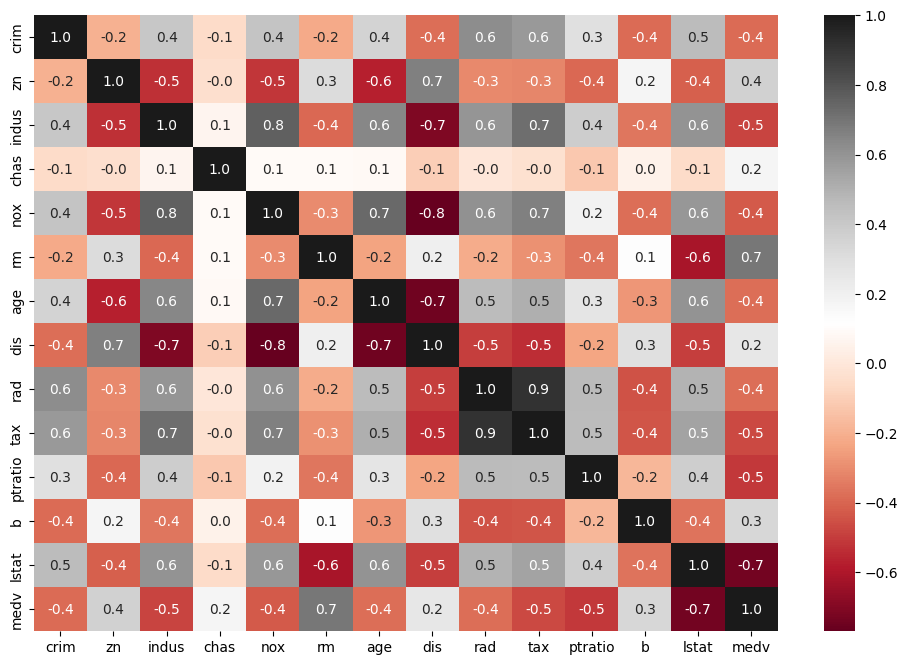

In [ ]:
df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),cmap = 'RdGy', annot = True, fmt = '.1f')

### **Preprocess dataset**

In [ ]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### **Seperating dependent (y) and independent (x) variables**

In [ ]:
X = df.drop('medv', axis = 1)
Y = df.medv

print(X.shape,Y.shape)

(506, 13) (506,)


### **Splitting training and testing dataset**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.20, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print('Y_test', Y_test.shape)

X_train (404, 13)
Y_train (404,)
X_test (102, 13)
Y_test (102,)


In [ ]:
# ct = make_column_transformer(
#     (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# )

# # Normalization and data type change
# X_train = ct.fit_transform(X_train).astype('float32')
# X_test = ct.transform(X_test).astype('float32')
# y_train = Y_train.astype('float32')
# y_test = Y_test.astype('float32')

# # Distribution of X_train feature values after normalization
# pd.DataFrame(X_train).describe()

### **Creating and training model**

In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))


In [ ]:
model.compile(
optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
loss=tf.keras.losses.MeanSquaredError(),
metrics=tf.keras.metrics.MeanSquaredError()
)
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch, verbose=True)

Epoch 1/150
13/13 [==============================] - 1s 2ms/step - loss: 26.3860 - mean_squared_error: 26.3860
Epoch 2/150
13/13 [==============================] - 0s 2ms/step - loss: 13.9235 - mean_squared_error: 13.9235
Epoch 3/150
13/13 [==============================] - 0s 2ms/step - loss: 13.2017 - mean_squared_error: 13.2017
Epoch 4/150
13/13 [==============================] - 0s 2ms/step - loss: 16.0353 - mean_squared_error: 16.0353
Epoch 5/150
13/13 [==============================] - 0s 2ms/step - loss: 12.1093 - mean_squared_error: 12.1093
Epoch 6/150
13/13 [==============================] - 0s 2ms/step - loss: 12.0037 - mean_squared_error: 12.0037
Epoch 7/150
13/13 [==============================] - 0s 2ms/step - loss: 12.3122 - mean_squared_error: 12.3122
Epoch 8/150
13/13 [==============================] - 0s 2ms/step - loss: 14.7496 - mean_squared_error: 14.7496
Epoch 9/150
13/13 [==============================] - 0s 2ms/step - loss: 13.7280 - mean_squared_error: 13.7280
E

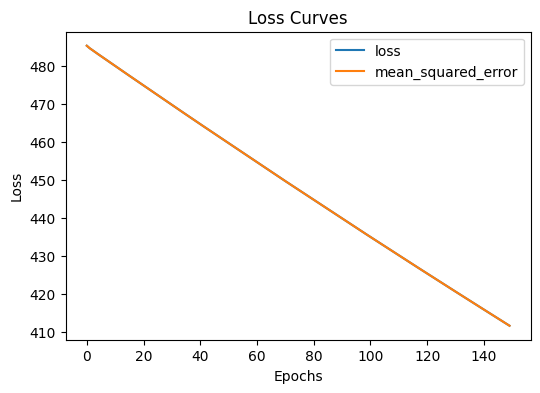

In [ ]:
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

### **Evaluating model**

4/4 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Test vs Prediction')

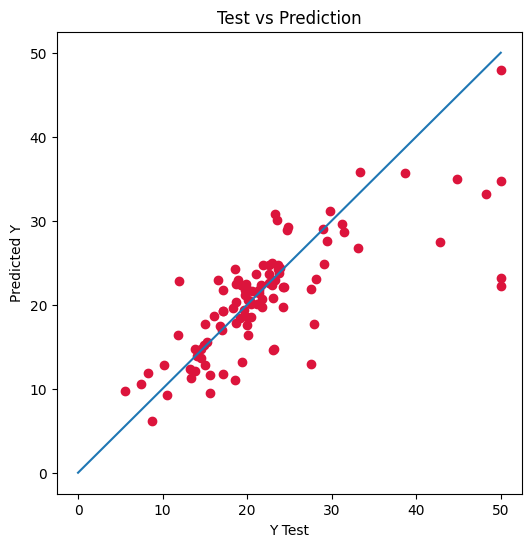

In [ ]:
pred = model.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, pred, c='crimson')
plt.plot(range(int(max(max(Y_test), max(pred)[0]))+1))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test vs Prediction')

In [ ]:
from sklearn.metrics import mean_squared_error
Y_predict = model.predict(X_test)
mse = mean_squared_error(Y_predict,Y_test)
mse

4/4 [==============================] - 0s 3ms/step


36.285470684786354

In [ ]:
print('The MSE value is: ', model.evaluate(X_test, Y_test, verbose=False)[0])

The MSE value is:  36.28546905517578
